<a href="https://colab.research.google.com/github/saranshikens/Basic-ML/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPLEMENTING LINEAR REGRESSON USING ONLY NUMPY**

**THEORY**  
Let us define some notations first.  

1.   $x_i$ - our input values,
2.   X - an array containing them,
3.   $y_i$ - the true ouput associated with each $x_i$,
4.   $Y$ - an array of $y_i$'s,
5.   $\hat{y}_i=wx_i+b$ - predictions for $x_i$,
     where $w$ is the weight and $b$ is the bias, and
6.   $\hat{Y}$ - an array of $\hat{y_i}$.

We will use $E(w,b)$ = Mean Square Error as our metric for loss.  
$E(w,b) = \displaystyle \dfrac{1}{n} \sum_{i=1}^{n} (y_i-\hat{y_i})^2 = \dfrac{1}{n} \sum_{i=1}^{n} (y_i-wx_i-b)^2$.  
$dw$ = $\dfrac{\partial{E}}{\partial{w}} = \displaystyle \dfrac{2}{n} \sum_{i=1}^{n} x_i(\hat{y_i}-y_i)$.  
$db$ = $\dfrac{\partial{E}}{\partial{b}} = \displaystyle \dfrac{2}{n} \sum_{i=1}^{n} \hat{y_i}-y_i$.  
In matrix notation, $\dfrac{\partial{E}}{\partial{w}} = \dfrac{2}{n} X^T \cdot (\hat{Y}-Y)$.  
To update the weights and bias, we change $w$ and $b$ as $w = w - \alpha \cdot dw$ and $b = b - \alpha \cdot db$, where $\alpha$ is the learning rate defined by user.   
We use these new weights and bias for predicting, and repeat this process for a user defined number of iterations.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**IMPLEMENTATION OF THE THEORY**

In [ ]:
class Linear_Regression:
  def __init__(self, lr=0.01, n_iter=1000):
    self.lr = lr
    self.n_iter = n_iter
    self.weight = None
    self.bias = None

  def fit(self, X, y):
    n_sample, n_feature = X.shape
    self.weight = np.zeros(n_feature)
    self.bias = 0

    for i in range(self.n_iter):
      y_pred = np.dot(X, self.weight) + self.bias
      dw = 2/n_sample * np.dot(X.T, y_pred - y)
      db = 2/n_sample * np.sum(y_pred - y)
      self.weight = self.weight - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self, X):
    y_pred = np.dot(X, self.weight) + self.bias
    return y_pred


**DEFINING MEAN SQUARE ERROR**

In [ ]:
def mse(y_pred, y):
  return np.mean((y_pred-y)**2)

**GENERATING INPUT WITH NOISE**

In [ ]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

**TESTING OUR MODEL ON THE INPUT**

In [ ]:
model = Linear_Regression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(mse(prediction, y_test))

1.0441597402671754


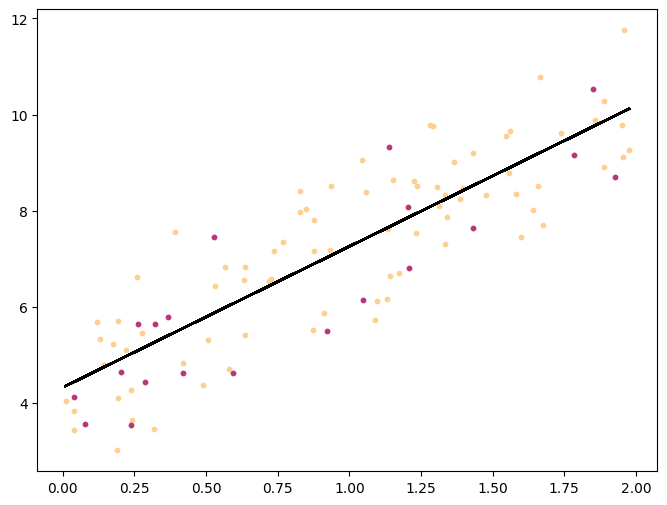

In [ ]:
regression_line = model.predict(X)
cmap = plt.get_cmap('magma')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, regression_line, color='black')
plt.show()